# DEA Waterbodies all time statistics

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

import sys
import glob
import itertools
import xarray as xr
import numpy as np
import pandas as pd

In [2]:
# Read in the csv
AttrTable = pd.read_csv('PaperData/dea_waterbodies_seasonal_area_ws.csv')

In [3]:
# Convert the columns we can to floats (from strings)
for column in AttrTable:
    try:
        AttrTable[column] = AttrTable[column].dtype(float)
    except:
        continue

In [4]:
AttrTable

,UID,STATE,Shape_Leng,Shape_Area,1986WINTER,1986SPRING,1987SUMMER,1987AUTUMN,1987WINTER,1987SPRING,...,2018AUTUMN,2018WINTER,2018SPRING,2019SUMMER,2019AUTUMN,2019WINTER,2019SPRING,2020SUMMER,2020AUTUMN,2020WINTER
0,q9cusmx7n,WA,5.500000e+02,1.187500e+04,0.0,NaN,NaN,0.0,NaN,0.000000e+00,...,5.089286e+03,6.250000e+03,6.562500e+03,7.053571e+03,7.083333e+03,7125.000000,5416.666667,5.491071e+03,6.875000e+03,10312.500000
1,q9cuu1dbv,WA,1.600000e+03,3.500000e+04,0.0,NaN,NaN,NaN,NaN,0.000000e+00,...,1.987500e+04,1.687500e+04,2.906250e+04,2.056250e+04,2.156250e+04,20520.833333,24375.000000,2.110577e+04,2.281250e+04,22500.000000
2,q9cuuc4dp,WA,4.000000e+02,5.000000e+03,0.0,NaN,NaN,0.0,NaN,0.000000e+00,...,2.291667e+03,1.696429e+03,1.625000e+03,1.964286e+03,2.500000e+03,2000.000000,1875.000000,1.979167e+03,2.000000e+03,1000.000000
3,q9cuv3u3x,WA,3.500000e+02,6.250000e+03,3750.0,NaN,NaN,NaN,NaN,5.000000e+03,...,3.750000e+03,2.291667e+03,3.541667e+03,4.187500e+03,3.750000e+03,2000.000000,3906.250000,3.076923e+03,3.125000e+03,3000.000000
4,q9cuv6j1r,WA,3.000000e+02,5.000000e+03,3125.0,NaN,NaN,NaN,NaN,4.375000e+03,...,1.875000e+03,1.770833e+03,7.812500e+02,1.015625e+03,1.125000e+03,2083.333333,1250.000000,9.375000e+02,1.750000e+03,1979.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295901,rnj90n5ef,QLD,1.050000e+03,5.062500e+04,NaN,NaN,NaN,NaN,NaN,9.375000e+03,...,4.187500e+04,2.218750e+04,2.500000e+03,NaN,3.250000e+04,38750.000000,28125.000000,2.687500e+04,2.062500e+04,NaN
295902,r42f3t8r0,SA,1.938015e+06,1.612169e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.685000e+07,1.027083e+05,7.701000e+07,NaN,NaN,NaN,NaN,NaN
295903,qu0tbwjqr,WA,8.514678e+04,5.073126e+07,NaN,NaN,NaN,NaN,NaN,1.818750e+05,...,2.492917e+06,NaN,3.593750e+04,5.106875e+06,4.348958e+06,NaN,273625.000000,9.189375e+06,1.367042e+07,NaN
295904,r49b5nmwq,SA,9.934631e+04,3.878000e+07,NaN,NaN,NaN,NaN,NaN,5.768750e+05,...,NaN,1.860938e+07,2.110417e+05,4.387500e+04,6.005208e+06,NaN,5875.000000,1.184375e+06,0.000000e+00,NaN


## All Australia analysis

In [5]:
# Find the total number of waterbodies
NumberofWB = len(AttrTable)
print(NumberofWB)

# Find the total area of waterbodies
AreaofWB = AttrTable['Shape_Area'].sum()
print(AreaofWB)

295906
87548718812.30687


### Create an empty dataframe to put the summary statistics into

In [6]:
AttrTableStats = pd.DataFrame(columns=AttrTable.columns)

### Now calculate the number and area of wet/dry/unknown waterbody pixels

In [7]:
# Create a new row with just a count of waterbodies with some water in them
# we need to do this in a loop because of the string columns
for column in AttrTable:
    try:
        AttrTableStats.loc['TotalWetCount',column] = (AttrTable[column] > 0).sum()
    except:
        continue

# Create a new row called 'Total' that has the sums of each column
AttrTableStats.loc['TotalWetArea',:] = AttrTable.sum(axis=0)

# Create a new row with all the NaNs summed up
AttrTableStats.loc['TotalNaNCount',:] = AttrTable.isna().sum()

# Calculate the area of NaNs by multiplying the nan/not-nan boolean by the area of the waterbody
for column in AttrTable:
    try:
        AttrTableStats.loc['TotalNaNArea',column] = (AttrTable[column].isna() * AttrTable['Shape_Area']).sum()
    except TypeError:
        continue

# Create a new row with the remainder - aka dry
for column in AttrTable:
    try:
        AttrTableStats.loc['TotalDryArea',column] = AreaofWB - (AttrTableStats.loc['TotalWetArea'][column] + AttrTableStats.loc['TotalNaNArea'][column])
    except TypeError:
        continue

# Create a new row with the remainder as a total - aka dry
for column in AttrTable:
    try:
        AttrTableStats.loc['TotalDryCount',column] = NumberofWB - (AttrTableStats.loc['TotalWetCount'][column] + AttrTableStats.loc['TotalNaNCount'][column])
    except TypeError:
        continue

In [9]:
AttrTableStats

,UID,STATE,Shape_Leng,Shape_Area,1986WINTER,1986SPRING,1987SUMMER,1987AUTUMN,1987WINTER,1987SPRING,...,2018AUTUMN,2018WINTER,2018SPRING,2019SUMMER,2019AUTUMN,2019WINTER,2019SPRING,2020SUMMER,2020AUTUMN,2020WINTER
TotalWetCount,NaN,NaN,295906,295906,65604,5445,0,52981,51625,127630,...,210268,193785,179072,170210,199213,186304,159318,174456,223804,176024
TotalWetArea,q9cusmx7nq9cuu1dbvq9cuuc4dpq9cuv3u3xq9cuv6j1rq...,NaN,6.64782e+08,8.75487e+10,7.33521e+09,1.61153e+09,0,3.48095e+09,4.22842e+09,1.11469e+10,...,1.49238e+10,1.40228e+10,1.22592e+10,1.03431e+10,1.21154e+10,1.26873e+10,9.21084e+09,1.153e+10,1.70591e+10,1.14925e+10
TotalNaNCount,0,703,0,0,156411,280073,295906,149789,175724,9783,...,3262,5595,1062,4763,3499,6145,747,2736,2905,14363
TotalNaNArea,0,4.43894e+07,0,0,6.05009e+10,8.04157e+10,8.75487e+10,6.01655e+10,7.00617e+10,2.19771e+10,...,1.1301e+10,2.27875e+10,5.29117e+09,1.71508e+09,7.01703e+09,2.3219e+10,3.63842e+09,2.95595e+09,8.19617e+09,3.30288e+10
TotalDryArea,NaN,NaN,8.68839e+10,0,1.97126e+10,5.52149e+09,0,2.39023e+10,1.32586e+10,5.44248e+10,...,6.13239e+10,5.07385e+10,6.99984e+10,7.54905e+10,6.84163e+10,5.16424e+10,7.46995e+10,7.30627e+10,6.22934e+10,4.30274e+10
TotalDryCount,NaN,NaN,0,0,73891,10388,0,93136,68557,158493,...,82376,96526,115772,120933,93194,103457,135841,118714,69197,105519


### Create a stacked bar chart showing the relative area of water in each waterbody

In [19]:
DataToPlot = AttrTableStats.loc[['TotalWetArea', 'TotalDryArea', 'TotalNaNArea']]
DataToPlot.drop(['UID', 'STATE', 'Shape_Leng', 'Shape_Area'], axis = 1, inplace=True)
DataToPlot.loc['TotalNaNArea'] = DataToPlot.loc['TotalNaNArea'] / 1000000
DataToPlot.loc['TotalWetArea'] = DataToPlot.loc['TotalWetArea'] / 1000000
DataToPlot.loc['TotalDryArea'] = DataToPlot.loc['TotalDryArea'] / 1000000

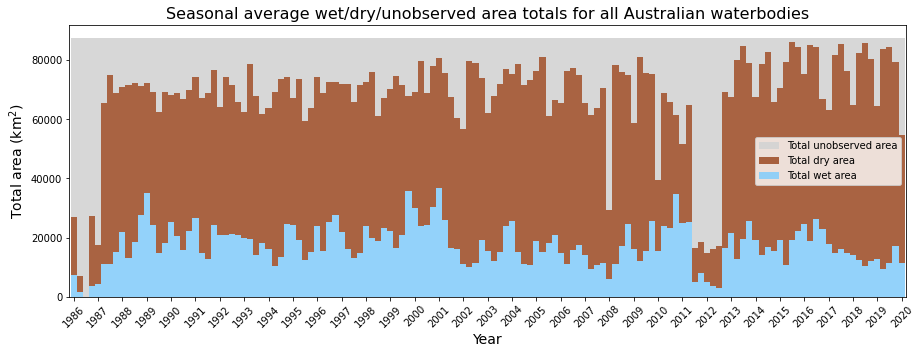

In [20]:
ax = DataToPlot.T.plot.bar(stacked=True, figsize=([15,5]), width = 1, color=['lightskyblue', 'sienna', 'lightgrey'], alpha=0.9);
ax.set_xticks(np.arange(0,len(ax.get_xticklabels()), 4));
ax.set_xticklabels([t[:4] for t in DataToPlot.columns[::4]], rotation=45);
plt.xlabel('Year', fontsize=14);
plt.ylabel('Total area (km$^2$)', fontsize = 14);
plt.legend(reversed(plt.legend().legendHandles), reversed(['Total wet area', 'Total dry area', 'Total unobserved area']))
plt.title('Seasonal average wet/dry/unobserved area totals for all Australian waterbodies', fontsize=16);
plt.savefig('AllAustraliaSeasonalObsAreaAllTime.jpg')

### Now plot by count of waterbodies with some water in them (> 0)

In [21]:
DataToPlot = AttrTableStats.loc[['TotalWetCount', 'TotalDryCount', 'TotalNaNCount']]
DataToPlot.drop(['UID', 'STATE', 'Shape_Leng', 'Shape_Area'], axis = 1, inplace=True)

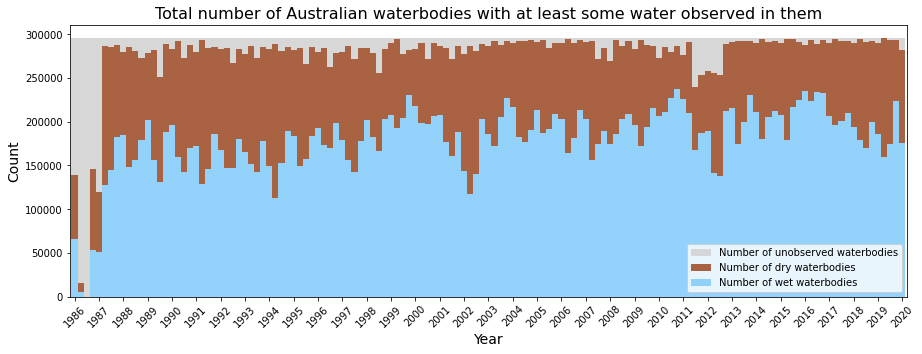

In [22]:
ax = DataToPlot.T.plot.bar(stacked=True, figsize=([15,5]), width = 1, color=['lightskyblue', 'sienna', 'lightgrey'], alpha=0.9);
ax.set_xticks(np.arange(0,len(ax.get_xticklabels()), 4));
ax.set_xticklabels([t[:4] for t in DataToPlot.columns[::4]], rotation=45);
plt.xlabel('Year', fontsize=14);
plt.ylabel('Count', fontsize = 14);
plt.legend(reversed(plt.legend().legendHandles), reversed(['Number of wet waterbodies', 
                                                           'Number of dry waterbodies', 
                                                           'Number of unobserved waterbodies']))
plt.title('Total number of Australian waterbodies with at least some water observed in them', fontsize=16);
plt.savefig('AllAustraliaSeasonalObsCountAllTime.jpg')

## State by state analysis

In [4]:
StateGroups = AttrTable.groupby('STATE').sum()

In [5]:
StateGroups

,OBJECTID,Join_Count,TARGET_FID,area,perimeter,WB_ID,F1986WINTER,F1986SPRING,F1987SUMMER,F1987AUTUMN,...,F2018SPRING,F2019SUMMER,F2019AUTUMN,F2019WINTER,F2019SPRING,F2020SUMMER,F2020AUTUMN,F2020WINTER,Shape_Length,Shape_Area
STATE,,,,,,,,,,,,,,,,,,,,,
ACT,26167365,187,26167178,1.697563e+07,3.357537e+05,2.616718e+07,2953.000000,0.0,0.0,2303.10,...,5.557012e+03,6.085956e+03,6.988892e+03,8.017244e+03,5.907442e+03,4.153767e+03,6.110757e+03,7.112505e+03,3.358000e+05,1.697562e+07
NSW,7724647107,45676,7724601431,8.066720e+09,9.648200e+07,7.724601e+09,650073.716667,0.0,0.0,473663.55,...,7.129498e+05,5.670702e+05,7.137780e+05,8.589292e+05,6.348080e+05,5.583043e+05,1.466086e+06,1.381777e+06,9.647811e+07,8.066720e+09
NT,4515515535,31508,4515484027,1.025633e+10,8.050915e+07,4.515484e+09,174101.650000,0.0,0.0,123625.65,...,2.907816e+05,5.656406e+05,6.066101e+05,2.450406e+05,2.146913e+05,4.548631e+05,7.569175e+05,3.227018e+05,8.051456e+07,1.025632e+10
OT,711441,5,711436,6.068748e+05,7.950571e+03,7.114360e+05,0.000000,0.0,0.0,198.10,...,2.002944e+02,1.777464e+02,1.779536e+02,2.192956e+02,1.892225e+02,1.484444e+02,1.693000e+02,1.690167e+02,7.950000e+03,6.068750e+05
QLD,22424968821,94788,22424874033,1.290760e+10,1.946250e+08,2.242487e+10,821264.700000,0.0,0.0,685386.60,...,1.244075e+06,2.010023e+06,2.868632e+06,2.045085e+06,1.096374e+06,1.579707e+06,3.313753e+06,2.329585e+06,1.946923e+08,1.290760e+10
SA,3082921564,22671,3082898893,2.440084e+10,8.549199e+07,3.082899e+09,215097.850000,0.0,0.0,118107.40,...,3.566308e+05,1.399619e+05,4.773180e+05,5.610888e+05,2.578249e+05,1.427792e+05,3.435142e+05,3.196299e+05,8.553133e+07,2.440084e+10
TAS,805262493,6627,805255866,1.332050e+09,9.754284e+06,8.052559e+08,55263.800000,0.0,0.0,32122.60,...,3.548121e+05,2.595201e+05,2.114732e+05,2.381420e+05,3.125572e+05,2.552395e+05,2.714833e+05,1.926144e+05,9.750800e+06,1.332050e+09
VIC,2325049894,19841,2325030053,3.266035e+09,3.142353e+07,2.325030e+09,457381.300000,0.0,0.0,96892.45,...,7.066124e+05,4.865295e+05,4.104861e+05,7.422176e+05,7.236583e+05,4.663780e+05,5.789543e+05,6.787140e+05,3.142363e+07,3.266035e+09
WA,2792189661,73900,2792115761,2.725718e+10,1.653009e+08,2.792116e+09,986099.150000,291691.4,0.0,327016.30,...,1.398497e+06,6.426329e+05,8.839917e+05,1.785830e+06,8.916473e+05,7.660166e+05,1.082012e+06,1.302772e+06,1.652816e+08,2.725718e+10
